In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop

In [45]:
import os
from PIL import Image

Data Processing

In [ ]:
target_size = (224, 224)

# Define the path to your training dataset
train_path = "corn_maize/test"

In [51]:
# Loop through all subdirectories in the training dataset directory
for class_dir in os.listdir(train_path):
    class_path = os.path.join(train_path, class_dir)
    print(class_path)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            # Check if the file is an image
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                # Construct the path to the image file
                img_path = os.path.join(class_path, filename)
                # Open the image file using PIL
                img = Image.open(img_path)
                # Resize the image to the target size
                img = img.resize(target_size)
                # Convert the image to RGB
                img = img.convert("RGB")
                # Overwrite the original image file with the resized image
                img.save(img_path)
                print(img_path)
            else:
                continue

corn_maize/test\Blight
corn_maize/test\Blight\Corn_Blight (100).jpg
corn_maize/test\Blight\Corn_Blight (101).jpg
corn_maize/test\Blight\Corn_Blight (102).jpg
corn_maize/test\Blight\Corn_Blight (103).jpg
corn_maize/test\Blight\Corn_Blight (104).jpg
corn_maize/test\Blight\Corn_Blight (105).jpg
corn_maize/test\Blight\Corn_Blight (106).jpg
corn_maize/test\Blight\Corn_Blight (107).jpg
corn_maize/test\Blight\Corn_Blight (108).jpg
corn_maize/test\Blight\Corn_Blight (109).jpg
corn_maize/test\Blight\Corn_Blight (110).jpg
corn_maize/test\Blight\Corn_Blight (125).jpg
corn_maize/test\Blight\Corn_Blight (130).jpg
corn_maize/test\Blight\Corn_Blight (134).jpg
corn_maize/test\Blight\Corn_Blight (139).jpg
corn_maize/test\Blight\Corn_Blight (144).jpg
corn_maize/test\Blight\Corn_Blight (147).jpg
corn_maize/test\Blight\Corn_Blight (162).jpg
corn_maize/test\Blight\Corn_Blight (165).jpg
corn_maize/test\Blight\Corn_Blight (175).jpg
corn_maize/test\Blight\Corn_Blight (176).jpg
corn_maize/test\Blight\Corn_Blig

In [52]:
# Define the image dimensions and number of classes
img_width, img_height = 224, 224
num_classes = 4
num_channels = 3

In [53]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        validation_split=0.2)

In [54]:
# Generate the training and validation sets from your directory
train_generator = datagen.flow_from_directory(
        'corn_maize/train',
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        subset='training')

Found 1677 images belonging to 4 classes.


In [55]:
val_generator = datagen.flow_from_directory(
        'corn_maize/train',
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        subset='validation')

Found 417 images belonging to 4 classes.


Build Model

In [56]:
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# Define your RNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [57]:
# Add a flatten layer to convert the output of the convolutional layers into a 1D array
model.add(Flatten())

# Add a dense layer with 512 units and relu activation
model.add(Dense(512, activation='relu'))

# Add an output layer with a softmax activation and two output units (for the two classes)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 26, 26, 128)      

In [58]:
batch_size = 16
train_steps = int(np.ceil(train_generator.samples / batch_size))
val_steps = int(np.ceil(val_generator.samples / batch_size))

# Train your model
history = model.fit(train_generator,
                    epochs=2,
                    validation_data=val_generator,
                    steps_per_epoch=np.ceil(train_generator.samples / train_generator.batch_size),
                    validation_steps=np.ceil(val_generator.samples / val_generator.batch_size))

Epoch 1/2
105/105 [==============================] - 304s 3s/step - loss: 1.2354 - accuracy: 0.5069 - val_loss: 0.6233 - val_accuracy: 0.8249
Epoch 2/2
105/105 [==============================] - 247s 2s/step - loss: 0.6726 - accuracy: 0.7537 - val_loss: 0.4025 - val_accuracy: 0.8369


In [60]:
# Generate predictions for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'corn_maize/test',
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode=None,
        shuffle=False)

Found 2094 images belonging to 4 classes.


In [61]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1) # Convert from one-hot encoding to class labels

131/131 [==============================] - 87s 660ms/step


In [62]:
y_pred

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [63]:
# Generate the true labels for the test set
y_true = test_generator.classes

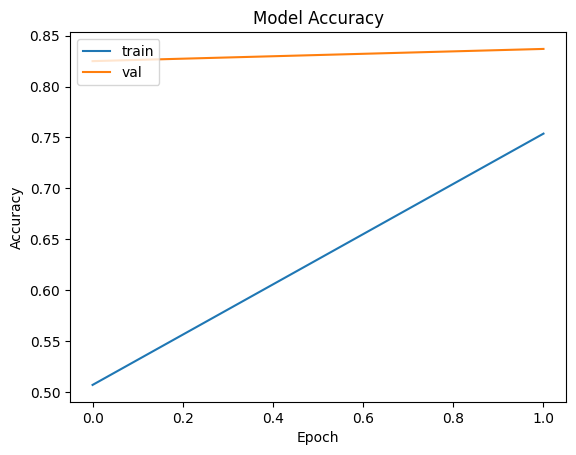

In [64]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Save Model

In [65]:
model.save('mri_model_1.h5')

c:\Users\jiten\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

In [66]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [67]:
# Define the image dimensions and number of classes
img_width, img_height = 224, 224
num_classes = 4

In [68]:
# Load and preprocess your uploaded image
img = image.load_img('corn_maize/test/Common_Rust/Corn_Common_Rust (2).jpg')
img = img.convert("RGB")
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

In [69]:
# Use your model to predict the class of the uploaded image
pred = model.predict(img)
print(pred)
class_idx = np.argmax(pred[0])
print(class_idx)
classes = train_generator.class_indices
print(classes)
class_label = list(classes.keys())[list(classes.values()).index(class_idx)]
print(class_label)

print("Predicted class: ", class_label)

1/1 [==============================] - 0s 176ms/step
[[9.3422741e-01 2.4781959e-02 4.0915105e-02 7.5536358e-05]]
0
{'Blight': 0, 'Common-Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
Blight
Predicted class:  Blight
